## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Basic EDA

In [2]:
df=pd.read_csv(r"C:\Users\Sri_Harshitha\Downloads\Tasks\Video Games Sales.csv")

In [3]:
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [4]:
df.shape

(1907, 13)

In [5]:
df.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

In [6]:
df=df.drop(["index"],axis=1)

In [7]:
df["Platform"].value_counts()

PS2     372
PS      223
X360    219
PS3     202
Wii     161
DS      149
GBA      75
XB       72
PC       71
PSP      63
NES      60
N64      57
GC       55
GB       48
SNES     41
3DS      15
GEN      11
DC        6
SAT       3
WiiU      2
SCD       1
PSV       1
Name: Platform, dtype: int64

In [8]:
df["Platform"].nunique()

22

In [9]:
df["Year"].value_counts()

2008.0    184
2007.0    157
2009.0    131
2010.0    130
2004.0    122
2003.0    114
2002.0    110
2005.0    105
2006.0    103
2011.0    100
2001.0     91
1998.0     81
2000.0     67
1999.0     66
2012.0     60
1997.0     54
1996.0     47
1995.0     22
1994.0     21
1992.0     20
1990.0     13
1993.0     12
1986.0     12
1991.0     10
1984.0      9
1989.0      9
1988.0      9
1987.0      7
1985.0      6
1983.0      6
Name: Year, dtype: int64

Text(0.5, 1.0, 'Game Genres')

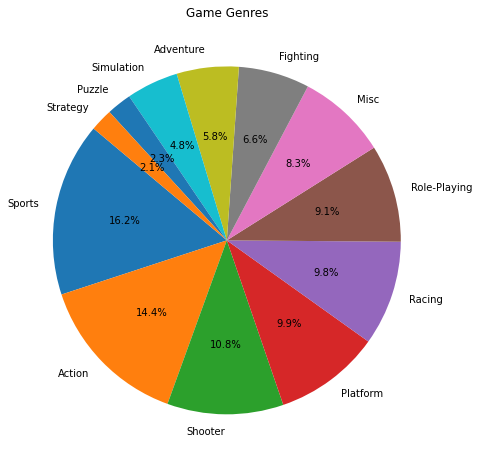

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Game Genres')

In [11]:
df["Publisher"].value_counts()

Electronic Arts                341
Nintendo                       296
Sony Computer Entertainment    156
Activision                     141
Ubisoft                         93
                              ... 
Sony Online Entertainment        1
Natsume                          1
Pacific Century Cyber Works      1
Square EA                        1
Pinnacle                         1
Name: Publisher, Length: 94, dtype: int64

In [12]:
df["Publisher"].nunique()

94

## Year

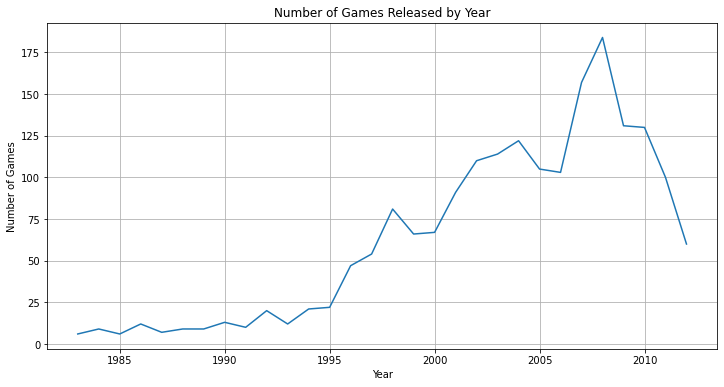

In [13]:
game_count_by_year = df.groupby('Year')['Game Title'].count()
# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(game_count_by_year.index, game_count_by_year.values)
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)

In [14]:
df["Global"].unique()

array([81.12, 40.24, 33.55, 31.52, 30.26, 29.08, 28.71, 28.31, 26.75,
       24.5 , 23.1 , 22.74, 22.47, 21.15, 20.81, 20.61, 20.02, 19.9 ,
       18.14, 18.05, 17.28, 16.15, 15.85, 15.24, 14.88, 14.87, 14.64,
       13.9 , 13.1 , 13.  , 12.65, 11.89, 11.88, 11.85, 11.84, 11.75,
       11.58, 11.51, 11.36, 11.23, 11.18, 11.15, 10.76, 10.55, 10.49,
       10.18, 10.12,  9.94,  9.87,  9.86,  9.78,  9.72,  9.66,  9.4 ,
        9.39,  9.36,  9.3 ,  8.87,  8.82,  8.76,  8.69,  8.49,  8.23,
        8.09,  8.05,  8.03,  7.94,  7.9 ,  7.87,  7.86,  7.71,  7.6 ,
        7.52,  7.47,  7.46,  7.2 ,  7.16,  7.11,  7.07,  7.01,  6.96,
        6.95,  6.92,  6.9 ,  6.83,  6.76,  6.7 ,  6.6 ,  6.56,  6.51,
        6.43,  6.41,  6.39,  6.38,  6.32,  6.31,  6.3 ,  6.27,  6.25,
        6.16,  6.14,  6.13,  6.05,  6.03,  5.99,  5.95,  5.92,  5.85,
        5.82,  5.8 ,  5.75,  5.74,  5.67,  5.64,  5.58,  5.55,  5.54,
        5.49,  5.47,  5.46,  5.45,  5.42,  5.37,  5.36,  5.35,  5.34,
        5.32,  5.31,

In [15]:
# Group the data by 'Genre' and aggregate the global sales and review scores
genre_sales_review = df.groupby('Genre').agg({'Global': 'sum', 'Review': 'mean'}).reset_index().sort_values(by='Global', ascending=False)
print(genre_sales_review)

           Genre  Global     Review
10        Sports  703.11  78.839513
0         Action  637.27  78.953709
4       Platform  595.24  78.384202
8        Shooter  557.20  81.079806
7   Role-Playing  496.20  83.913410
6         Racing  451.80  78.105376
3           Misc  426.12  72.769874
2       Fighting  249.00  82.208651
1      Adventure  239.45  81.480182
9     Simulation  205.14  73.811848
5         Puzzle  108.65  74.306818
11      Strategy   77.80  82.437250


In [16]:
# Group the data by 'Platform' and 'Genre' and aggregate global sales and review scores
platform_genre_analysis = df.groupby(['Platform', 'Genre']).agg({'Global': 'sum', 'Review': 'mean'}).reset_index()
platform_genre_global_sorted = platform_genre_analysis.sort_values(by='Global', ascending=False)
platform_genre_review_sorted = platform_genre_analysis.sort_values(by='Review', ascending=False)


In [17]:
platform_genre_global_sorted.head(6)

,Platform,Genre,Global,Review
163,Wii,Sports,230.96,68.797556
172,X360,Shooter,198.56,84.123273
114,PS2,Sports,189.63,82.616277
104,PS2,Action,181.17,78.575469
156,Wii,Misc,137.43,68.855263
116,PS3,Action,122.67,83.590222


In [18]:
platform_genre_review_sorted.head(6)

,Platform,Genre,Global,Review
147,SNES,Puzzle,1.70,94.000
143,SNES,Adventure,6.03,94.000
8,DC,Action,1.14,93.630
63,N64,Adventure,10.96,93.500
12,DC,Sports,2.29,93.015
69,N64,Role-Playing,1.38,92.000


## North America

In [19]:
# Find the top 3 genres with the highest sales in North America
top_3_genres_na_sales = df.groupby('Genre')['North America'].sum().nlargest(3)
print("Top 3 genres with the highest sales in North America:")
print(top_3_genres_na_sales)


Top 3 genres with the highest sales in North America:
Genre
Sports     354.62
Shooter    333.40
Action     320.88
Name: North America, dtype: float64


In [20]:
# Group the data by 'Platform' and sum the sales in North America
platform_sales_na = df.groupby('Platform')['North America'].sum()
top_3_platforms_na_sales = platform_sales_na.nlargest(3)
print("Top 3 platforms with the highest sales in North America:")
print(top_3_platforms_na_sales)


Top 3 platforms with the highest sales in North America:
Platform
PS2     400.07
X360    335.44
Wii     292.66
Name: North America, dtype: float64


## Europe

In [21]:
top_3_genres_na_sales = df.groupby('Genre')['Europe'].sum().nlargest(3)
print("Top 3 genres with the highest sales in Europe")
print(top_3_genres_na_sales)


Top 3 genres with the highest sales in Europe
Genre
Sports     221.09
Action     205.91
Shooter    155.89
Name: Europe, dtype: float64


In [22]:
platform_sales_europe = df.groupby('Platform')['Europe'].sum()
platform_with_highest_europe_sales = platform_sales_europe.idxmax()
highest_europe_sales = platform_sales_europe.nlargest(3)
print("The platform with the highest sales in Europe is")
print(highest_europe_sales)


The platform with the highest sales in Europe is
Platform
PS2    268.53
Wii    191.73
PS3    160.70
Name: Europe, dtype: float64


## Japan

In [23]:
top_3_genres_na_sales = df.groupby('Genre')['Japan'].sum().nlargest(3)
print("Top 3 genres with the highest sales in Japan:")
print(top_3_genres_na_sales)

Top 3 genres with the highest sales in Japan:
Genre
Role-Playing    169.32
Platform        104.17
Sports           56.47
Name: Japan, dtype: float64


In [24]:
platform_sales_europe = df.groupby('Platform')['Japan'].sum()
platform_with_highest_europe_sales = platform_sales_europe.idxmax()
highest_europe_sales = platform_sales_europe.nlargest(3)
print("The platform with the highest sales in Japan is")
print(highest_europe_sales)

The platform with the highest sales in Japan is
Platform
DS     106.48
NES     80.09
PS      64.41
Name: Japan, dtype: float64
